In [1]:
import numpy as np
import cv2
from skimage import data
from matplotlib import pyplot as plt

In [ ]:
# data shape & type
cat =  data.chelsea()
cat.shape
cat.dtype
cat.size

px = cat[100,100]
print(px)

#RED value접근
cat.item(10,10,2) #2=red, 0=blue
print(cat.item(10,10,2))

#Red 값 변경
cat.itemset((10,10,2),100)
print(cat.item(10,10,2))

In [ ]:
# cv2로 image 띄우기
cv2.imshow('test_cat', cat)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt로 image 띄우기
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick on X and Y axis
plt.show()

In [ ]:
cat_cv = cv2.cvtColor(cat,cv2.COLOR_RGB2BGR)

In [ ]:
img = cv2.imread("cat_cv.tif",0) #0=grayscale, 1=color, -1=unchanged
print(img)
new_cat_cv = cv2.imread("image")

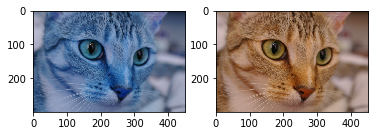

In [2]:
img = cv2.imread('cat_cv.tif')
img2 = img[:,:,::-1]
plt.subplot(121); plt.imshow(img) # expects distored color 
plt.subplot(122); plt.imshow(img2) # expects true color 
plt.show()

In [ ]:
# Create a black image 
img = np.zeros((512,512,3), np.uint8) 
# Draw a diagonal blue line with thickness of 5 px 
img = cv2.line(img,(0,0),(511,511),(255,0,255),5)
# RECTANGLE
img_r = cv2.circle(img,(447,63), 63, (0,0,255), -1)
# Ellipse
img_e = np.zeros((512,512,3), np.uint8) 
img_e = cv2.ellipse(img,(256,256),(100,50),0,45,180,255,-1)

plt.imshow(img)
plt.imshow(img_r)
plt.imshow(img_e)
plt.show()

In [ ]:
events = [i for i in dir(cv2) if 'EVENT' in i]
print(events)

In [ ]:
drawing = False # true if mouse is pressed 
mode = True # if True, draw rectangle. Press 'm' to toggle to curve 
ix,iy = -1,-1 # mouse callback function 


def draw_circle(event,x,y,flags,param): 
    global ix, iy, drawing, mode
    
    if event == cv2.EVENT_LBUTTONDBLCLK: # double click event! 
        drawing = True
        ix, iy = x, y
    
    elif event == cv2.EVENT_MOUSEMOVE: # mouse move event 
        if drawing == True: 
            if mode == True: 
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else: 
                cv2.circle(img,(x,y),5,(0,0,255),-1) 
    elif event == cv2.EVENT_LBUTTONUP: # left button up event 
        drawing = False 
        if mode == True: 
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1) 
        else: 
            cv2.circle(img,(x,y),5,(0,0,255),-1)


img = np.zeros((512,512,3), np.uint8) 
cv2.namedWindow('image') 
cv2.setMouseCallback('image',draw_circle) 

while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC 
        break 
        
cv2.destroyAllWindows()

In [ ]:
BLUE = [255,0,0] 

img1 = cv2.imread('image.jpg') 

replicate = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE) 
reflect = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT) 
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101) 
wrap = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP) 
constant= cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE) 

img1 = img1[:,:,::-1] 
replicate = replicate[:,:,::-1] 
reflect = reflect[:,:,::-1] 
reflect101 = reflect101[:,:,::-1] 
wrap = wrap[:,:,::-1] 
constant = constant[:,:,::-1]

print('See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):')
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')

In [ ]:
img = cv2.imread('image.jpg',0)
kernel = np.ones((5,5), np.uint8)

erosion = cv2.erode(img, kernel, iterations = 1)
dilation = cv2.dilate(img, kernel, iterations = 1) 
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.figure(figsize=(10,5))
plt.subplot('121') 
plt.imshow(img,cmap='gray'), plt.axis('off') 
plt.subplot('122') 
plt.imshow(gradient,cmap='gray'), plt.axis('off')

In [ ]:
rows,cols = img.shape

#translation 
M = np.float32([[1,0,150], [0,1,50]]) 
dst = cv2.warpAffine(img,M,(cols,rows))

#rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1) 
print(M) 
dst = cv2.warpAffine(img,M,(cols,rows)) 

#Scailing
height, width = img.shape[:2] 
print("original dimension : ({}, {})".format(height,width)) 
dst = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC) 
print("modified dimension :",zoomed_cat.shape) 

#Cropping
dst = zoomed_cat[150:300,250:450] 

#Affine Transform
pts1 = np.float32([[38,38],[145,38],[38,145]]) 
pts2 = np.float32([[10,100],[200,50],[100,250]]) 
M = cv2.getAffineTransform(pts1,pts2) 
dst = cv2.warpAffine(img,M,(cols,rows)) 

#Perspective Transform
pts1 = np.float32([[62,69],[392,54],[31,404],[413,410]]) 
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])  
M = cv2.getPerspectiveTransform(pts1, pts2) 
dst = cv2.warpPerspective(img, M, (1100,1100))

plt.figure(figsize=(12,12)) 
plt.subplot(121); plt.imshow(img, cmap='gray'), plt.axis('off') 
plt.subplot(122); plt.imshow(dst, cmap='gray'), plt.axis('off') 
plt.show()

In [ ]:
#완전 중요
import cv2 
import numpy as np 

points = [] 

# 왼쪽 상단, 오른쪽 상단, 왼쪽 하단, 오른쪽 하단 순으로 클릭하시오. 
# mouse callback function 

def draw_circle(event,x,y,flags,param): 
    if event == cv2.EVENT_LBUTTONDBLCLK: 
        global points 
        cv2.circle(img,(x,y),10,(255,0,0),-1) 
        print(x,y) 
        points.append([x,y]) 

# Create a black image, a window and bind the function to window 
img = cv2.imread('image.jpg')
rows,cols,ch = img.shape 
cv2.namedWindow('image') 
cv2.setMouseCallback('image',draw_circle) 

while(1): 
    cv2.imshow('image',img) 
    if cv2.waitKey(20) & 0xFF == 27: # enter ESC 
        break 
    if len(points) == 3: 
        pts1 = np.float32(points) 
        pts2 = np.float32([[10,100],[200,50],[100,250]]) 
        M = cv2.getAffineTransform(pts1,pts2) 
        dst = cv2.warpAffine(img,M,(cols,rows))
        cv2.imshow('after',dst) 
    elif len(points) == 4:
        pts1 = np.float32(points) 
        pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]]) 
        M = cv2.getPerspectiveTransform(pts1,pts2) 
        dst = cv2.warpPerspective(img,M,(300,300))
        cv2.imshow('after',dst) 


cv2.destroyAllWindows()